In [1]:
!pip install xgboost

In [2]:
import xgboost as xgb

import pandas as pd
import numpy as np
from numpy.random import rand, randint, randn
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# persist individual files
df_train = pd.read_csv('linear_data_train.csv', header=None)
df_val = pd.read_csv('linear_data_val.csv', header=None)
df_test = pd.read_csv('linear_data_test.csv', header=None)

In [4]:
x_train = df_train.iloc[:,2].to_numpy().reshape(-1,1)
y_train = df_train.iloc[:,1].to_numpy().reshape(-1,1)

x_val = df_val.iloc[:,2].to_numpy().reshape(-1,1)
y_val = df_val.iloc[:,1].to_numpy().reshape(-1,1)

x_test = df_test.iloc[:,2].to_numpy().reshape(-1,1)
y_test = df_test.iloc[:,1].to_numpy().reshape(-1,1)

In [5]:
xgbr = xgb.XGBRFRegressor()
xgbr.fit(x_train, y_train, eval_set=[(x_train,y_train),(x_val,y_val)])

#validation-0 is error on training data
#validation-1 is error on val data

[0]	validation_0-rmse:7.53027	validation_1-rmse:20.82892


XGBRFRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
               colsample_bynode=0.8, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints=None,
               learning_rate=1, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=0, num_parallel_tree=100,
               objective='reg:squarederror', random_state=0, reg_alpha=0,
               reg_lambda=1e-05, scale_pos_weight=1, subsample=0.8,
               tree_method=None, validate_parameters=False, verbosity=None)

In [6]:
#get training values
eval_result = xgbr.evals_result()
eval_result

{'validation_0': {'rmse': [7.530268]}, 'validation_1': {'rmse': [20.82892]}}

In [7]:
# get important features
xgbr.feature_importances_

array([1.], dtype=float32)

In [8]:
# do predictions on test dataset
pred_y = xgbr.predict(x_test)

[]

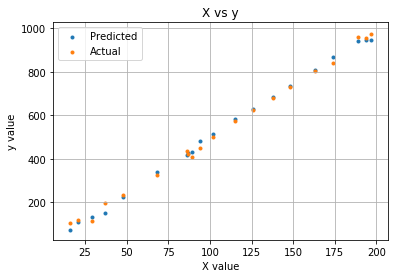

In [9]:
plt.scatter(x_test, pred_y,label='Predicted', marker='.')
plt.scatter(x_test, y_test,label='Actual', marker='.')
plt.grid(True)
plt.xlabel('X value')
plt.ylabel('y value')
plt.title('X vs y')
plt.legend()
plt.plot()